# COVID-19 USA(California) Confirmed Cases and Fatalities Forecasting

**In this notebook, the model will be predicting the cumulative number of confirmed COVID19 cases in California, as well as the number of resulting fatalities, for future dates. We understand this is a serious situation, and in no way want to trivialize the human impact this crisis is causing by predicting fatalities. Our goal is to provide better methods for estimates that can assist medical and governmental institutions to prepare and adjust as pandemics unfold.**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/covid19-local-us-ca-forecasting-week-1/ca_submission.csv
/kaggle/input/covid19-local-us-ca-forecasting-week-1/ca_train.csv
/kaggle/input/covid19-local-us-ca-forecasting-week-1/ca_test.csv


**Reading the Data**

In [2]:
train=pd.read_csv("/kaggle/input/covid19-local-us-ca-forecasting-week-1/ca_train.csv")
test=pd.read_csv("/kaggle/input/covid19-local-us-ca-forecasting-week-1/ca_test.csv")
submission=pd.read_csv("/kaggle/input/covid19-local-us-ca-forecasting-week-1/ca_submission.csv")

**Exploratory Data Analysis and Visualization**

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train['Date']=pd.to_datetime(train['Date'])
train['Date'] = train['Date'].apply(lambda x:x.date().strftime('%m-%d'))
test['Date']=pd.to_datetime(test['Date'])
test['Date'] = test['Date'].apply(lambda x:x.date().strftime('%m-%d'))

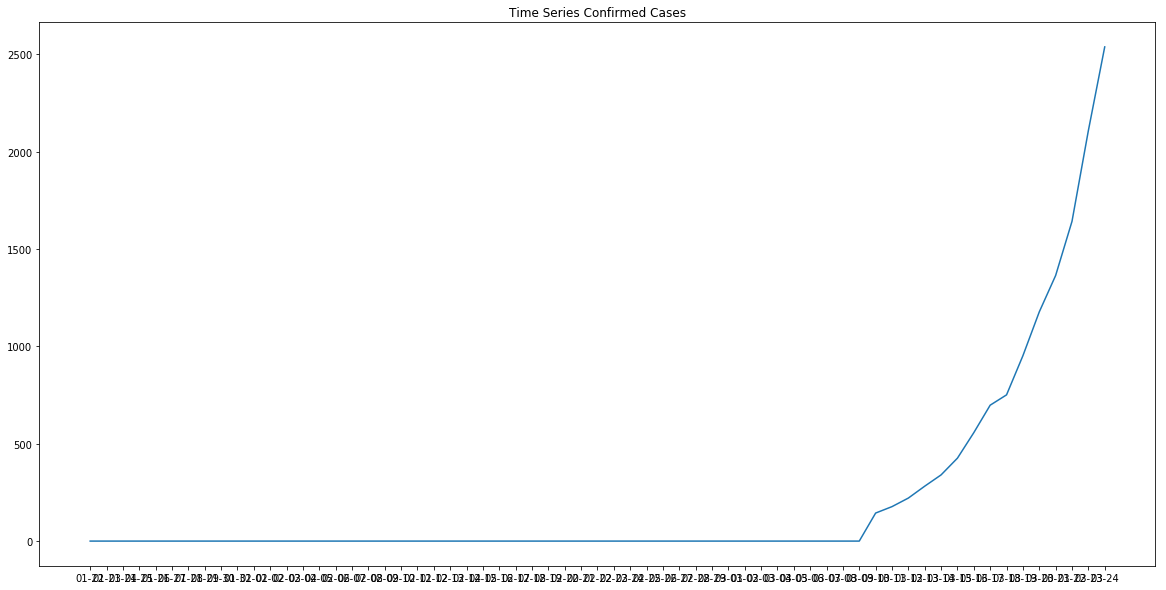

In [5]:
hor=train['Date']
ver=train['ConfirmedCases']
plt.figure(figsize=(20,10))
plt.plot(hor, ver)
plt.title('Time Series Confirmed Cases')
plt.show()

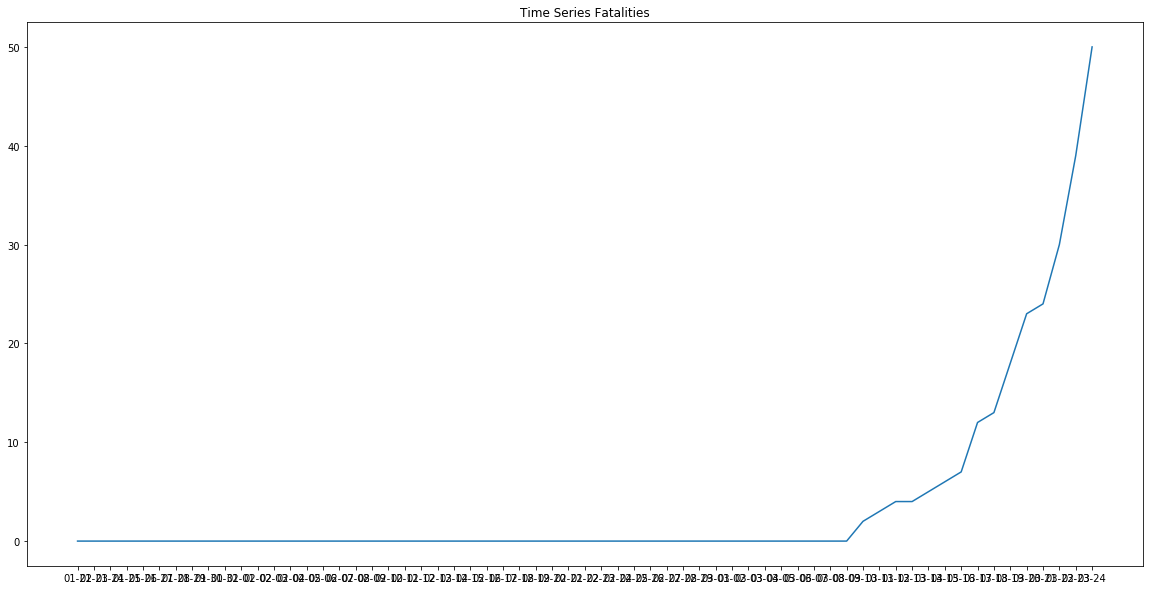

In [6]:
hor=train['Date']
ver=train['Fatalities']
plt.figure(figsize=(20,10))
plt.plot(hor, ver)
plt.title('Time Series Fatalities')
plt.show()

**Analysis and Feature Engineering**

In [7]:
train1=train[48:]  #excluding first 48 values from train dataset as they are all zero
#train1=train
train1.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
48,49,California,US,36.1162,-119.6816,03-10,144.0,2.0
49,50,California,US,36.1162,-119.6816,03-11,177.0,3.0
50,51,California,US,36.1162,-119.6816,03-12,221.0,4.0
51,52,California,US,36.1162,-119.6816,03-13,282.0,4.0
52,53,California,US,36.1162,-119.6816,03-14,340.0,5.0


In [8]:
X_test1=test[['ForecastId']]+50 #matching the test data Id in line to training ID's

In [9]:
X1=train1[['Id']]
y_con=train1[['ConfirmedCases']]
y_fat=train1[['Fatalities']]

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(7) #Polynomial Feature with degree 7
X=poly.fit_transform(X1)
X_test=poly.fit_transform(X_test1)

**Building the Model**

In [11]:
from sklearn.linear_model import Ridge, Lasso, SGDRegressor, LinearRegression
model_con=Lasso()
model_con.fit(X, y_con)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25564.948822890114, tolerance: 764.27524
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [12]:
y_pred_con=model_con.predict(X_test)

In [13]:
model_fat=Lasso()
model_fat.fit(X, y_fat)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.528507191779667, tolerance: 0.2978
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [14]:
y_pred_fat=model_fat.predict(X_test)

In [15]:
y_pred_con1=y_pred_con.ravel()
y_pred_fat1=y_pred_fat.ravel()


In [16]:
y_pred_con1=y_pred_con1[13:]  #replacing 13 test prediction with training label as they overlap
y_con_t=train1['ConfirmedCases']
y_con_t=y_con_t[2:].ravel()  #getting those 13 labels from training set to put into prediction
#y_con_t=y_con_t[50:].ravel()
y_pred_con_final=np.round(np.append(y_con_t, y_pred_con1))
y_pred_con_final

array([  221.,   282.,   340.,   426.,   557.,   698.,   751.,   952.,
        1177.,  1364.,  1642.,  2108.,  2538.,  2867.,  3333.,  3848.,
        4418.,  5044.,  5731.,  6481.,  7300.,  8191.,  9159., 10207.,
       11340., 12565., 13884., 15305., 16832., 18472., 20231., 22114.,
       24129., 26283., 28582., 31035., 33650., 36434., 39396., 42546.,
       45891., 49443., 53211.])

In [17]:
y_pred_fat1=y_pred_fat1[13:] #replacing 13 test prediction with training label as they overlap
y_fat_t=train1['Fatalities']
y_fat_t=y_fat_t[2:].ravel() #getting those 13 labels from training set to put into prediction
#y_fat_t=y_fat_t[50:].ravel()
y_pred_fat_final=np.round(np.append(y_fat_t, y_pred_fat1))
y_pred_fat_final

array([   4.,    4.,    5.,    6.,    7.,   12.,   13.,   18.,   23.,
         24.,   30.,   39.,   50.,   56.,   66.,   77.,   90.,  103.,
        119.,  135.,  153.,  173.,  195.,  219.,  244.,  272.,  302.,
        335.,  370.,  408.,  449.,  492.,  539.,  589.,  643.,  701.,
        762.,  827.,  897.,  972., 1051., 1135., 1224.])

**Preparing the Submission File**

In [18]:
data={'ForecastId':submission.ForecastId,'ConfirmedCases':y_pred_con_final, 'Fatalities':y_pred_fat_final}
result=pd.DataFrame(data, index=submission.index)
result.to_csv('/kaggle/working/submission.csv', index=False)
m1=pd.read_csv('/kaggle/working/submission.csv')
m1.head()

,ForecastId,ConfirmedCases,Fatalities
0,1,221.0,4.0
1,2,282.0,4.0
2,3,340.0,5.0
3,4,426.0,6.0
4,5,557.0,7.0


**Predicted Result Visualization**

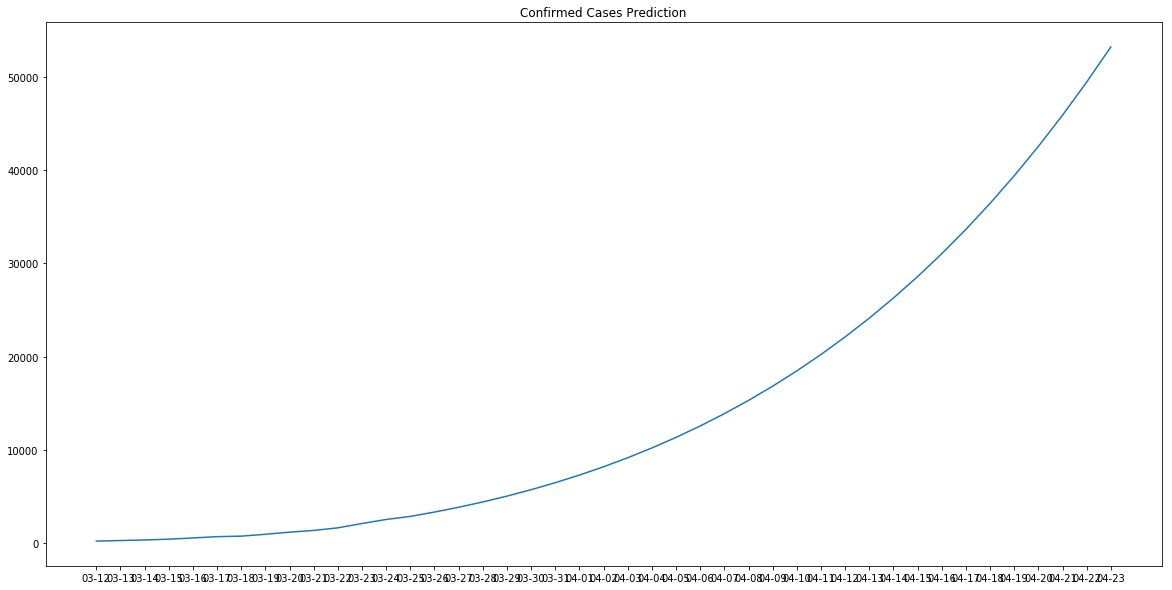

In [19]:
hor=test.Date
ver=y_pred_con_final
plt.figure(figsize=(20,10))
plt.plot(hor, ver)
plt.title('Confirmed Cases Prediction')
plt.show()

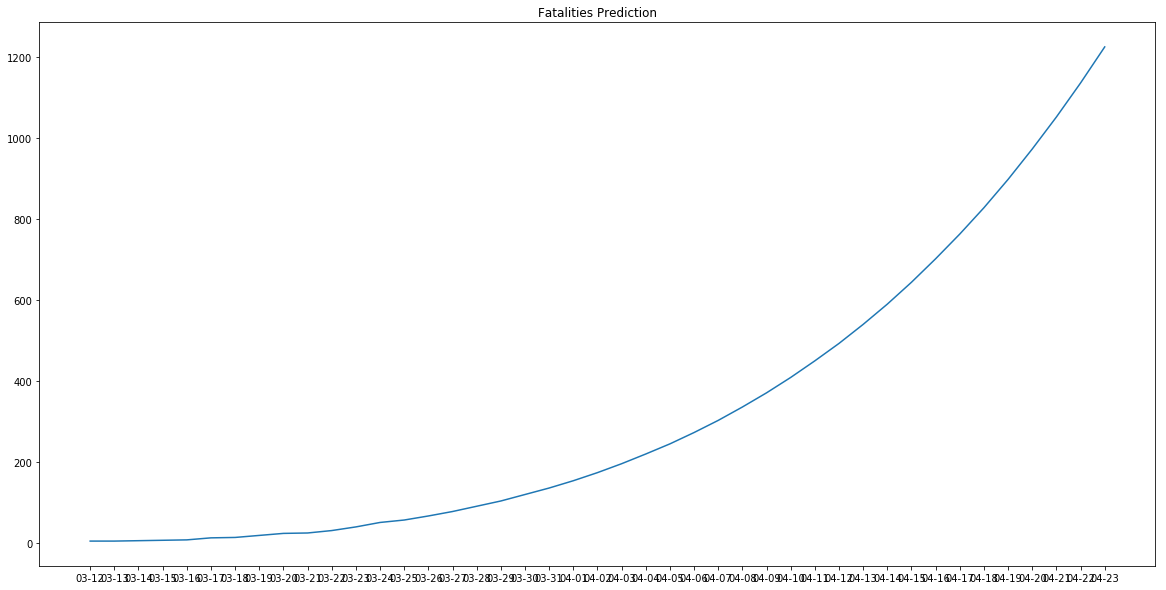

In [20]:
hor=test.Date
ver=y_pred_fat_final
plt.figure(figsize=(20,10))
plt.plot(hor, ver)
plt.title('Fatalities Prediction')
plt.show()

**#StayHome #StaySafe #May Almighty bless us all.**

**Please upvote if you like this or find this notebook useful, thanks.**